In [156]:
import numpy as np
from keras.optimizers import rmsprop_v2
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age', 'class']
X_features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age']
dataset = pd.read_csv('datasets_14370_19291_pima-indians-diabetes.csv', names=features)

In [157]:
df1 = dataset.loc[dataset['class'] == 1]
df2 = dataset.loc[dataset['class'] == 0] 

df1 = df1.replace({'BP':0}, np.median(df1['BP']))
df2 = df2.replace({'BP':0}, np.median(df2['BP']))

df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))

df1 = df1.replace({'glucose':0}, np.median(df1['glucose']))
df2 = df2.replace({'glucose':0}, np.median(df2['glucose']))

df1 = df1.replace({'skin':0}, np.median(df1['skin']))
df2 = df2.replace({'skin':0}, np.median(df2['skin']))

dataframe = [df1, df2]
dataset = pd.concat(dataframe)
dataset = dataset.sample(frac = 1)

In [158]:
X = dataset.iloc[:,0:8]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.58823529 0.36774194 0.53061224 ... 0.3006135  0.03970965 0.7       ]
 [0.64705882 0.63870968 0.71428571 ... 0.37627812 0.07514944 0.5       ]
 [0.05882353 0.33548387 1.         ... 0.08588957 0.05508113 0.1       ]
 ...
 [0.05882353 0.23225806 0.31632653 ... 0.01840491 0.07685739 0.        ]
 [0.52941176 0.43870968 0.59183673 ... 0.20449898 0.51409052 0.48333333]
 [0.05882353 0.43870968 0.48979592 ... 0.33128834 0.19214347 0.06666667]]


In [159]:
X

array([[0.58823529, 0.36774194, 0.53061224, ..., 0.3006135 , 0.03970965,
        0.7       ],
       [0.64705882, 0.63870968, 0.71428571, ..., 0.37627812, 0.07514944,
        0.5       ],
       [0.05882353, 0.33548387, 1.        , ..., 0.08588957, 0.05508113,
        0.1       ],
       ...,
       [0.05882353, 0.23225806, 0.31632653, ..., 0.01840491, 0.07685739,
        0.        ],
       [0.52941176, 0.43870968, 0.59183673, ..., 0.20449898, 0.51409052,
        0.48333333],
       [0.05882353, 0.43870968, 0.48979592, ..., 0.33128834, 0.19214347,
        0.06666667]])

In [160]:
Y = dataset.iloc[:,8]

In [161]:
Y

763    0
24     1
106    0
257    0
371    0
      ..
440    1
2      1
90     0
618    1
411    0
Name: class, Length: 768, dtype: int64

In [216]:
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='HeUniform', kernel_regularizer=l1(0.001), activation='relu'))
model.add(Dense(8, kernel_initializer='HeUniform', activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, kernel_initializer='HeUniform', activation='sigmoid'))

In [217]:
opti = rmsprop_v2.RMSprop(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opti, metrics=['accuracy'])

In [218]:
#es = EarlyStopping(monitor='val_accuracy',mode='max',restore_best_weights=True,patience=400), callbacks=[es]

In [219]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [220]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=900, batch_size=768)

Epoch 1/900
1/1 [==============================] - 2s 2s/step - loss: 1.1639 - accuracy: 0.3794 - val_loss: 1.1301 - val_accuracy: 0.5669
Epoch 2/900
1/1 [==============================] - 0s 36ms/step - loss: 1.1182 - accuracy: 0.6206 - val_loss: 1.1092 - val_accuracy: 0.5984
Epoch 3/900
1/1 [==============================] - 0s 40ms/step - loss: 1.0956 - accuracy: 0.6265 - val_loss: 1.0932 - val_accuracy: 0.6181
Epoch 4/900
1/1 [==============================] - 0s 46ms/step - loss: 1.0786 - accuracy: 0.6459 - val_loss: 1.0794 - val_accuracy: 0.6181
Epoch 5/900
1/1 [==============================] - 0s 47ms/step - loss: 1.0643 - accuracy: 0.6556 - val_loss: 1.0672 - val_accuracy: 0.6142
Epoch 6/900
1/1 [==============================] - 0s 48ms/step - loss: 1.0519 - accuracy: 0.6576 - val_loss: 1.0559 - val_accuracy: 0.6220
Epoch 7/900
1/1 [==============================] - 0s 42ms/step - loss: 1.0404 - accuracy: 0.6537 - val_loss: 1.0449 - val_accuracy: 0.6220
Epoch 8/900
1/1 [=====

1/1 [==============================] - 0s 43ms/step - loss: 0.6864 - accuracy: 0.7490 - val_loss: 0.6854 - val_accuracy: 0.7520
Epoch 60/900
1/1 [==============================] - 0s 46ms/step - loss: 0.6816 - accuracy: 0.7490 - val_loss: 0.6798 - val_accuracy: 0.7520
Epoch 61/900
1/1 [==============================] - 0s 37ms/step - loss: 0.6776 - accuracy: 0.7510 - val_loss: 0.6761 - val_accuracy: 0.7598
Epoch 62/900
1/1 [==============================] - 0s 33ms/step - loss: 0.6729 - accuracy: 0.7490 - val_loss: 0.6705 - val_accuracy: 0.7520
Epoch 63/900
1/1 [==============================] - 0s 36ms/step - loss: 0.6692 - accuracy: 0.7549 - val_loss: 0.6674 - val_accuracy: 0.7559
Epoch 64/900
1/1 [==============================] - 0s 34ms/step - loss: 0.6648 - accuracy: 0.7490 - val_loss: 0.6615 - val_accuracy: 0.7520
Epoch 65/900
1/1 [==============================] - 0s 33ms/step - loss: 0.6610 - accuracy: 0.7510 - val_loss: 0.6586 - val_accuracy: 0.7559
Epoch 66/900
1/1 [========

1/1 [==============================] - 0s 32ms/step - loss: 0.5523 - accuracy: 0.7549 - val_loss: 0.5422 - val_accuracy: 0.7598
Epoch 118/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5516 - accuracy: 0.7685 - val_loss: 0.5409 - val_accuracy: 0.7795
Epoch 119/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5512 - accuracy: 0.7549 - val_loss: 0.5409 - val_accuracy: 0.7638
Epoch 120/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5505 - accuracy: 0.7685 - val_loss: 0.5399 - val_accuracy: 0.7835
Epoch 121/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5506 - accuracy: 0.7549 - val_loss: 0.5400 - val_accuracy: 0.7677
Epoch 122/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5499 - accuracy: 0.7665 - val_loss: 0.5387 - val_accuracy: 0.7835
Epoch 123/900
1/1 [==============================] - 0s 31ms/step - loss: 0.5497 - accuracy: 0.7510 - val_loss: 0.5386 - val_accuracy: 0.7677
Epoch 124/900
1/1 [=

Epoch 175/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5315 - accuracy: 0.7626 - val_loss: 0.5188 - val_accuracy: 0.7677
Epoch 176/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5314 - accuracy: 0.7626 - val_loss: 0.5182 - val_accuracy: 0.7835
Epoch 177/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5310 - accuracy: 0.7646 - val_loss: 0.5181 - val_accuracy: 0.7717
Epoch 178/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5307 - accuracy: 0.7646 - val_loss: 0.5178 - val_accuracy: 0.7835
Epoch 179/900
1/1 [==============================] - 0s 31ms/step - loss: 0.5306 - accuracy: 0.7646 - val_loss: 0.5181 - val_accuracy: 0.7677
Epoch 180/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5306 - accuracy: 0.7626 - val_loss: 0.5178 - val_accuracy: 0.7874
Epoch 181/900
1/1 [==============================] - 0s 37ms/step - loss: 0.5305 - accuracy: 0.7607 - val_loss: 0.5182 - val_accuracy: 0.7677
Epoch 

Epoch 233/900
1/1 [==============================] - 0s 36ms/step - loss: 0.5210 - accuracy: 0.7685 - val_loss: 0.5093 - val_accuracy: 0.7756
Epoch 234/900
1/1 [==============================] - 0s 36ms/step - loss: 0.5203 - accuracy: 0.7607 - val_loss: 0.5090 - val_accuracy: 0.7874
Epoch 235/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5204 - accuracy: 0.7665 - val_loss: 0.5091 - val_accuracy: 0.7756
Epoch 236/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5201 - accuracy: 0.7588 - val_loss: 0.5088 - val_accuracy: 0.7874
Epoch 237/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5202 - accuracy: 0.7665 - val_loss: 0.5091 - val_accuracy: 0.7717
Epoch 238/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5200 - accuracy: 0.7626 - val_loss: 0.5087 - val_accuracy: 0.7874
Epoch 239/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5200 - accuracy: 0.7665 - val_loss: 0.5093 - val_accuracy: 0.7717
Epoch 

Epoch 291/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5138 - accuracy: 0.7607 - val_loss: 0.5037 - val_accuracy: 0.7795
Epoch 292/900
1/1 [==============================] - 0s 36ms/step - loss: 0.5134 - accuracy: 0.7704 - val_loss: 0.5033 - val_accuracy: 0.7953
Epoch 293/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5129 - accuracy: 0.7646 - val_loss: 0.5032 - val_accuracy: 0.7835
Epoch 294/900
1/1 [==============================] - 0s 36ms/step - loss: 0.5130 - accuracy: 0.7685 - val_loss: 0.5028 - val_accuracy: 0.7913
Epoch 295/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5125 - accuracy: 0.7646 - val_loss: 0.5024 - val_accuracy: 0.7835
Epoch 296/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5122 - accuracy: 0.7626 - val_loss: 0.5025 - val_accuracy: 0.7953
Epoch 297/900
1/1 [==============================] - 0s 28ms/step - loss: 0.5121 - accuracy: 0.7665 - val_loss: 0.5023 - val_accuracy: 0.7835
Epoch 

Epoch 349/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5068 - accuracy: 0.7646 - val_loss: 0.4985 - val_accuracy: 0.7795
Epoch 350/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5066 - accuracy: 0.7724 - val_loss: 0.4986 - val_accuracy: 0.8071
Epoch 351/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5064 - accuracy: 0.7646 - val_loss: 0.4985 - val_accuracy: 0.7795
Epoch 352/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5065 - accuracy: 0.7704 - val_loss: 0.4987 - val_accuracy: 0.8071
Epoch 353/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5065 - accuracy: 0.7626 - val_loss: 0.4986 - val_accuracy: 0.7795
Epoch 354/900
1/1 [==============================] - 0s 34ms/step - loss: 0.5065 - accuracy: 0.7724 - val_loss: 0.4990 - val_accuracy: 0.8031
Epoch 355/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5067 - accuracy: 0.7646 - val_loss: 0.4989 - val_accuracy: 0.7795
Epoch 

Epoch 407/900
1/1 [==============================] - 0s 35ms/step - loss: 0.5016 - accuracy: 0.7626 - val_loss: 0.4948 - val_accuracy: 0.7953
Epoch 408/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5016 - accuracy: 0.7763 - val_loss: 0.4956 - val_accuracy: 0.8110
Epoch 409/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5016 - accuracy: 0.7626 - val_loss: 0.4947 - val_accuracy: 0.7913
Epoch 410/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5016 - accuracy: 0.7763 - val_loss: 0.4959 - val_accuracy: 0.8110
Epoch 411/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5020 - accuracy: 0.7626 - val_loss: 0.4951 - val_accuracy: 0.7913
Epoch 412/900
1/1 [==============================] - 0s 32ms/step - loss: 0.5019 - accuracy: 0.7802 - val_loss: 0.4960 - val_accuracy: 0.8071
Epoch 413/900
1/1 [==============================] - 0s 33ms/step - loss: 0.5020 - accuracy: 0.7626 - val_loss: 0.4952 - val_accuracy: 0.7913
Epoch 

Epoch 465/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4983 - accuracy: 0.7607 - val_loss: 0.4929 - val_accuracy: 0.7953
Epoch 466/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4981 - accuracy: 0.7782 - val_loss: 0.4945 - val_accuracy: 0.7992
Epoch 467/900
1/1 [==============================] - 0s 37ms/step - loss: 0.4982 - accuracy: 0.7626 - val_loss: 0.4929 - val_accuracy: 0.7953
Epoch 468/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4980 - accuracy: 0.7782 - val_loss: 0.4942 - val_accuracy: 0.8031
Epoch 469/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4978 - accuracy: 0.7626 - val_loss: 0.4927 - val_accuracy: 0.7953
Epoch 470/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4978 - accuracy: 0.7782 - val_loss: 0.4940 - val_accuracy: 0.8071
Epoch 471/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4975 - accuracy: 0.7607 - val_loss: 0.4924 - val_accuracy: 0.7953
Epoch 

Epoch 523/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4939 - accuracy: 0.7646 - val_loss: 0.4906 - val_accuracy: 0.7953
Epoch 524/900
1/1 [==============================] - 0s 29ms/step - loss: 0.4939 - accuracy: 0.7802 - val_loss: 0.4926 - val_accuracy: 0.7953
Epoch 525/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4943 - accuracy: 0.7665 - val_loss: 0.4915 - val_accuracy: 0.7913
Epoch 526/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4950 - accuracy: 0.7782 - val_loss: 0.4942 - val_accuracy: 0.7953
Epoch 527/900
1/1 [==============================] - 0s 45ms/step - loss: 0.4956 - accuracy: 0.7685 - val_loss: 0.4922 - val_accuracy: 0.7874
Epoch 528/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4958 - accuracy: 0.7743 - val_loss: 0.4941 - val_accuracy: 0.7953
Epoch 529/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4955 - accuracy: 0.7685 - val_loss: 0.4914 - val_accuracy: 0.7874
Epoch 

1/1 [==============================] - 0s 38ms/step - loss: 0.4917 - accuracy: 0.7802 - val_loss: 0.4909 - val_accuracy: 0.7953
Epoch 581/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4913 - accuracy: 0.7665 - val_loss: 0.4892 - val_accuracy: 0.7953
Epoch 582/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4915 - accuracy: 0.7802 - val_loss: 0.4906 - val_accuracy: 0.7953
Epoch 583/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4911 - accuracy: 0.7665 - val_loss: 0.4890 - val_accuracy: 0.7953
Epoch 584/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4912 - accuracy: 0.7802 - val_loss: 0.4906 - val_accuracy: 0.7953
Epoch 585/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4911 - accuracy: 0.7665 - val_loss: 0.4892 - val_accuracy: 0.7913
Epoch 586/900
1/1 [==============================] - 0s 30ms/step - loss: 0.4914 - accuracy: 0.7821 - val_loss: 0.4911 - val_accuracy: 0.7953
Epoch 587/900
1/1 [=

Epoch 638/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4892 - accuracy: 0.7879 - val_loss: 0.4897 - val_accuracy: 0.7992
Epoch 639/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4890 - accuracy: 0.7646 - val_loss: 0.4874 - val_accuracy: 0.7913
Epoch 640/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4888 - accuracy: 0.7879 - val_loss: 0.4893 - val_accuracy: 0.7992
Epoch 641/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4887 - accuracy: 0.7685 - val_loss: 0.4872 - val_accuracy: 0.7913
Epoch 642/900
1/1 [==============================] - 0s 37ms/step - loss: 0.4886 - accuracy: 0.7860 - val_loss: 0.4885 - val_accuracy: 0.7992
Epoch 643/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4880 - accuracy: 0.7685 - val_loss: 0.4869 - val_accuracy: 0.7913
Epoch 644/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4881 - accuracy: 0.7879 - val_loss: 0.4886 - val_accuracy: 0.7992
Epoch 

1/1 [==============================] - 0s 34ms/step - loss: 0.4851 - accuracy: 0.7685 - val_loss: 0.4847 - val_accuracy: 0.7874
Epoch 696/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4855 - accuracy: 0.7879 - val_loss: 0.4869 - val_accuracy: 0.8071
Epoch 697/900
1/1 [==============================] - 0s 31ms/step - loss: 0.4856 - accuracy: 0.7704 - val_loss: 0.4850 - val_accuracy: 0.7874
Epoch 698/900
1/1 [==============================] - 0s 30ms/step - loss: 0.4858 - accuracy: 0.7879 - val_loss: 0.4870 - val_accuracy: 0.8150
Epoch 699/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4856 - accuracy: 0.7724 - val_loss: 0.4848 - val_accuracy: 0.7874
Epoch 700/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4854 - accuracy: 0.7879 - val_loss: 0.4865 - val_accuracy: 0.8031
Epoch 701/900
1/1 [==============================] - 0s 34ms/step - loss: 0.4851 - accuracy: 0.7704 - val_loss: 0.4843 - val_accuracy: 0.7874
Epoch 702/900
1/1 [=

Epoch 753/900
1/1 [==============================] - 0s 37ms/step - loss: 0.4821 - accuracy: 0.7743 - val_loss: 0.4822 - val_accuracy: 0.7913
Epoch 754/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4820 - accuracy: 0.7782 - val_loss: 0.4836 - val_accuracy: 0.8031
Epoch 755/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4817 - accuracy: 0.7724 - val_loss: 0.4822 - val_accuracy: 0.7913
Epoch 756/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4820 - accuracy: 0.7802 - val_loss: 0.4843 - val_accuracy: 0.8110
Epoch 757/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4822 - accuracy: 0.7743 - val_loss: 0.4826 - val_accuracy: 0.7874
Epoch 758/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4825 - accuracy: 0.7860 - val_loss: 0.4846 - val_accuracy: 0.8071
Epoch 759/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4824 - accuracy: 0.7743 - val_loss: 0.4828 - val_accuracy: 0.7874
Epoch 

Epoch 811/900
1/1 [==============================] - 0s 35ms/step - loss: 0.4809 - accuracy: 0.7724 - val_loss: 0.4816 - val_accuracy: 0.7874
Epoch 812/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4809 - accuracy: 0.7840 - val_loss: 0.4829 - val_accuracy: 0.8110
Epoch 813/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4802 - accuracy: 0.7743 - val_loss: 0.4811 - val_accuracy: 0.7874
Epoch 814/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4802 - accuracy: 0.7743 - val_loss: 0.4822 - val_accuracy: 0.8110
Epoch 815/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4796 - accuracy: 0.7724 - val_loss: 0.4809 - val_accuracy: 0.7835
Epoch 816/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4799 - accuracy: 0.7743 - val_loss: 0.4818 - val_accuracy: 0.8071
Epoch 817/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4793 - accuracy: 0.7724 - val_loss: 0.4809 - val_accuracy: 0.7795
Epoch 

Epoch 869/900
1/1 [==============================] - 0s 39ms/step - loss: 0.4782 - accuracy: 0.7724 - val_loss: 0.4803 - val_accuracy: 0.7874
Epoch 870/900
1/1 [==============================] - 0s 37ms/step - loss: 0.4787 - accuracy: 0.7743 - val_loss: 0.4818 - val_accuracy: 0.8110
Epoch 871/900
1/1 [==============================] - 0s 32ms/step - loss: 0.4785 - accuracy: 0.7724 - val_loss: 0.4805 - val_accuracy: 0.7874
Epoch 872/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4790 - accuracy: 0.7743 - val_loss: 0.4829 - val_accuracy: 0.8110
Epoch 873/900
1/1 [==============================] - 0s 36ms/step - loss: 0.4794 - accuracy: 0.7685 - val_loss: 0.4814 - val_accuracy: 0.7874
Epoch 874/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4803 - accuracy: 0.7860 - val_loss: 0.4843 - val_accuracy: 0.8110
Epoch 875/900
1/1 [==============================] - 0s 33ms/step - loss: 0.4804 - accuracy: 0.7724 - val_loss: 0.4816 - val_accuracy: 0.7874
Epoch 

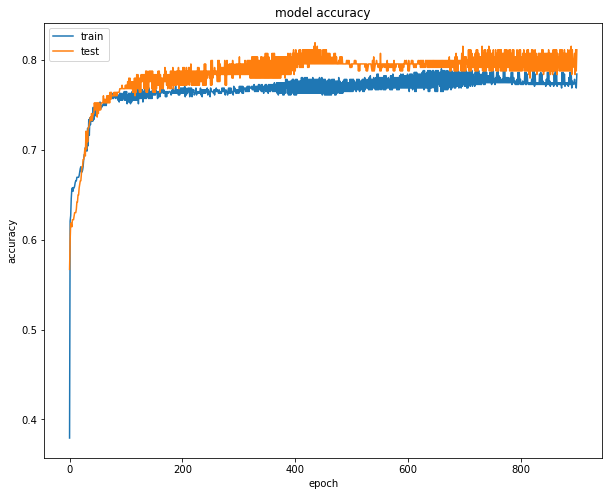

In [221]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

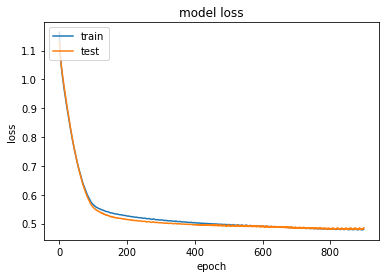

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [223]:
model.evaluate(X_val, y_val)

8/8 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8110


[0.4848531186580658, 0.8110235929489136]

In [224]:
model.evaluate(X_train,y_train)

17/17 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7743


[0.4805923402309418, 0.774319052696228]